In [ ]:
# --- Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1  # Only used for tuned version


# --- Config ---
DATASET_PATH = "/content/4_tvol_lidarLiveQMinMax.csv"
TUNED = True                      # Set to False for untuned version
LATENT_DIM = 16                  # Latent bottleneck
EPOCHS_AE = 50
EPOCHS_DNN = 100
BATCH_SIZE = 32

# --- Load and Clean Data ---
df = pd.read_csv(DATASET_PATH)
df = df.drop(columns=[col for col in ['origin', 'Origin', 'status', 'Status'] if col in df.columns])
X = df.drop(columns=["Target"])
y = df["Target"]

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

In [95]:
# --- Build Autoencoder ---
input_dim = X_train_raw.shape[1]
input_layer = Input(shape=(input_dim,))
x = Dense(64, activation='relu')(input_layer)
x = Dense(32, activation='relu')(x)

if TUNED:
    bottleneck = Dense(LATENT_DIM, activation='relu', activity_regularizer=l1(1e-6))(x)
else:
    bottleneck = Dense(LATENT_DIM, activation='relu')(x)

x = Dense(32, activation='relu')(bottleneck)
x = Dense(64, activation='relu')(x)
output_layer = Dense(input_dim, activation='linear')(x)

autoencoder = Model(inputs=input_layer, outputs=output_layer)
encoder = Model(inputs=input_layer, outputs=bottleneck)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train AE
history = autoencoder.fit(
    X_train_raw, X_train_raw,
    validation_split=0.1,
    epochs=EPOCHS_AE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    verbose=1
)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.1247 - val_loss: 0.1067
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0919 - val_loss: 0.0623
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0535 - val_loss: 0.0410
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0375 - val_loss: 0.0353
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0327 - val_loss: 0.0322
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0303 - val_loss: 0.0291
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0282 - val_loss: 0.0257
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0241 - val_loss: 0.0220
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0200 - val_loss: 0.0192
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0179 - val_loss: 0.0177
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0164 - val_loss: 0.0169
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0162 - val_loss: 0.0161
Epoch

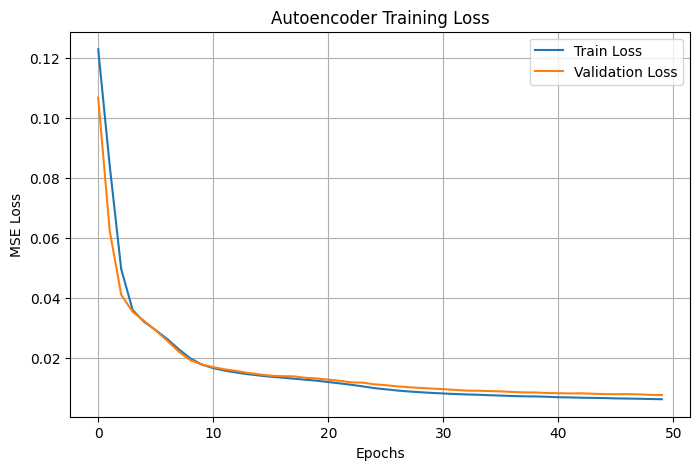

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 102871.2109 - val_loss: 133503.8438
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 114940.4766 - val_loss: 132784.5781
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 91248.2344 - val_loss: 131854.3750
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 98974.3281 - val_loss: 130515.8359
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 102229.9453 - val_loss: 128612.8203
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 97092.5781 - val_loss: 125914.1094
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 78985.2266 - val_loss: 122258.9453
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 105080.3281 - val_loss: 117178.0234
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 86874.2578 - val_loss: 110957.5312
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 70305.8984 - val_loss: 103252.7344
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 74011.

In [107]:
# Plot AE loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Autoencoder Training Loss")
plt.legend()
plt.grid(True)
plt.show()

# --- Extract Latent Features ---
X_train = encoder.predict(X_train_raw)
X_test = encoder.predict(X_test_raw)

# --- Build and Train DNN ---
dnn = Sequential([
    Dense(64, activation='relu', input_shape=(LATENT_DIM,)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])
dnn.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
dnn.fit(X_train, y_train, validation_split=0.2, epochs=EPOCHS_DNN, batch_size=16, callbacks=[early_stop], verbose=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
R²: 0.63572181152921
MAE: 92.47918553822656
MSE: 12952.809897007912


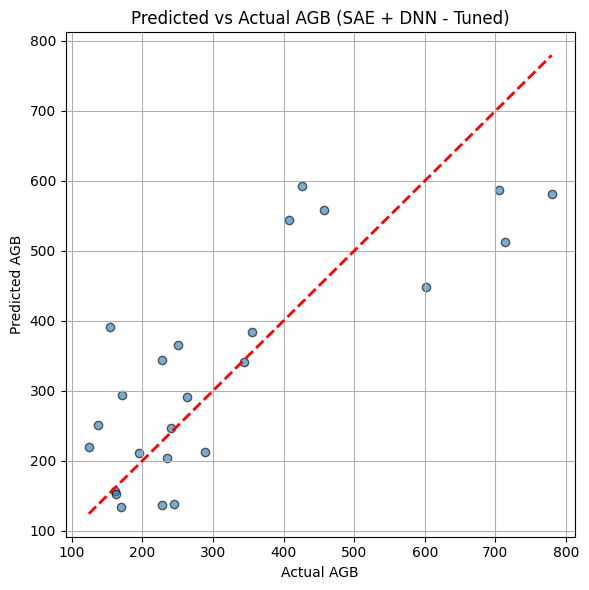

In [108]:
# --- Evaluate ---
y_pred = dnn.predict(X_test).flatten()
print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# --- Plot Prediction ---
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual AGB")
plt.ylabel("Predicted AGB")
title = "Predicted vs Actual AGB (SAE + DNN - " + ("Tuned" if TUNED else "Untuned") + ")"
plt.title(title)
plt.grid(True)
plt.tight_layout()
plt.show()